<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/projects/01NAEX_HW01_pendulum_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01NAEX project 01

**Team members: Jiří Nábělek, Bára Bumbálková, Štěpán Studenovský, Honza Zavadil**

# Research task:

The goal of this research task is to determine the effect of varying parameters on the frequency (or period) of a pendulum.


# Description:

You have the same number of operators as team members. Each of you will run the experiment, i.e. pendulum swinging and frequency measurement.
Each of you can choose different type of rope. You will measure with 3 different  lengths whose levels are 0.5m, 1m, 1.5m. Attach 1, 2, or 3 weights to the pendulum. Measure the frequency (or period) of the pendulum for each combination. In total, each operator will take 9 measurements.


# Submission:

Submit the elaborated measurement by October 23, 2023 in pdf/ Rmd /ipynb format (Python or R).

# Data description:
**Experimenter:**
*   Jiří Nábělek = 1
*   Bára Bumbálková = 2
*   Štěpán Studenovský = 3
*   Honza Zavadil = 4


**String material:**
*   linen string = 1
*   plastic string = 2



# Installing libraries:

In [ ]:
list_of_packages <- c("tidyverse", "nortest","lattice","pwr","MASS","agricolae","multcomp", "effects")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages

character(0)

In [ ]:
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

[[1]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[6]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[7]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "effects"   "carData"   "multcomp"  "TH.data"   "survival"  "mvtnorm"  
 [7] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "lubridate"
[13] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[19] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[25] "utils"     "datasets"  "methods"   "base"


# Questions:

1. Measure the data and set up the experiment so that it is *randomized*. Be sure to record the order of the measurements, type of rope, number of weights, and the operator (member of the group taking the measurements) for each measurement. Each operator should conduct one measurement for each combination of rope length and number of weights."


In [ ]:
data_exp <- read.table("https://raw.githubusercontent.com/jiri99/NAEX/main/data/DATA%20-%20NAEX.csv", header=TRUE, sep=";")
library(dplyr)
data <- data_exp %>% transmute(string = as.factor(string),
                          length = as.factor(length),
                          weight = as.factor(weight),
                          experimenter = as.factor(experimenter),
                          stopwatch = as.factor(stopwatch),
                          time = as.numeric(time),
                          period = as.numeric(period))

print(data)

   string length weight experimenter stopwatch  time period
1       1    1.5      1            1         4 12.40  2.480
2       1    1.5      2            1         2 12.20  2.440
3       1    1.5      3            1         3 12.53  2.506
4       1      1      1            1         4 10.11  2.022
5       1      1      2            1         3 10.11  2.022
6       1      1      3            1         2 10.08  2.016
7       1    0.5      1            1         2  7.18  1.436
8       1    0.5      2            1         3  7.20  1.440
9       1    0.5      3            1         4  7.16  1.432
10      2    1.5      1            2         4 12.35  2.470
11      2    1.5      2            2         1 12.06  2.412
12      2    1.5      3            2         3 12.26  2.452
13      2      1      1            2         3 10.12  2.024
14      2      1      2            2         1  9.86  1.972
15      2      1      3            2         4 10.03  2.006
16      2    0.5      1            2    


2. Calculate the basic statistics (mean, median, and sd for each variable). Display the measured data (box plot, interaction plot, effects plot) and comment on what we can predict about the outcome from the given figures before the analysis.


In [ ]:
summary(data)

 string length   weight experimenter stopwatch      time            period     
 1:18   0.5:12   1:12   1:9          1:9       Min.   : 6.880   Min.   :1.376  
 2:18   1  :12   2:12   2:9          2:9       1st Qu.: 7.195   1st Qu.:1.439  
        1.5:12   3:12   3:9          3:9       Median :10.095   Median :2.019  
                        4:9          4:9       Mean   : 9.801   Mean   :1.960  
                                               3rd Qu.:12.162   3rd Qu.:2.433  
                                               Max.   :12.530   Max.   :2.506  

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


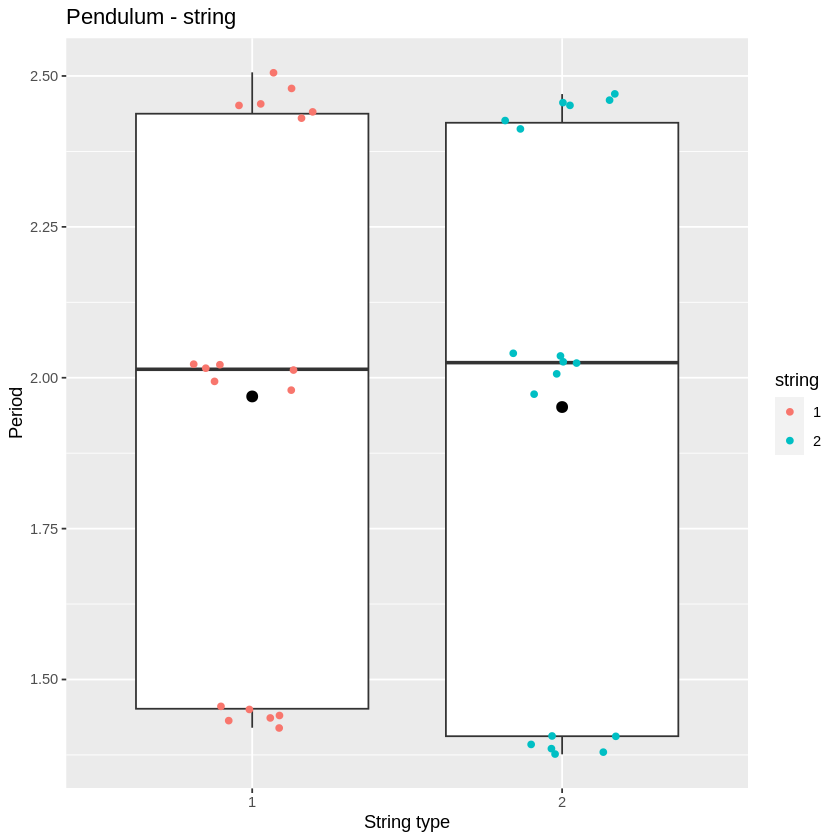

In [ ]:
ggplot(data, aes(x=string, y=period)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=string), position=position_jitter(width=0.2)) +
  labs(title="Pendulum - string", x="String type", y="Period")

The type of string (1 or 2) doesn't seem to have a significant difference in the average period. Both string types have approximately similar effects on the period.

Warning message:
“Removed 3 rows containing missing values (`geom_segment()`).”


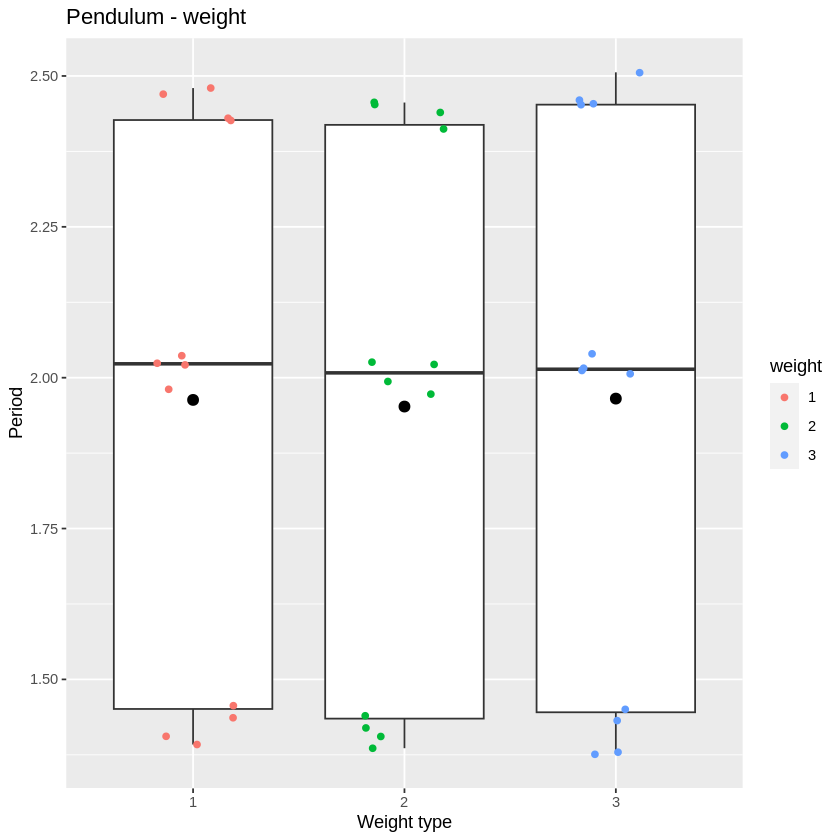

In [ ]:
ggplot(data, aes(x=weight, y=period)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=weight), position=position_jitter(width=0.2)) +
  labs(title="Pendulum - weight", x="Weight type", y="Period")

The weight on the pendulum doesnt seem to affect the period either, as expected by underlying physics.

Warning message:
“Removed 3 rows containing missing values (`geom_segment()`).”


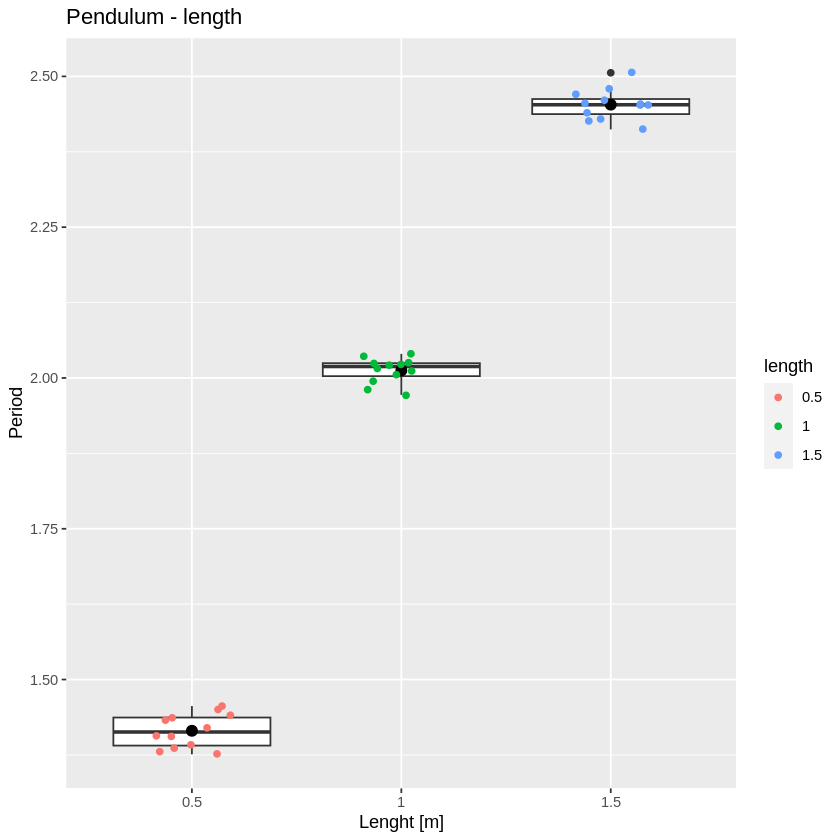

In [ ]:
ggplot(data, aes(x=length, y=period)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=length), position=position_jitter(width=0.2)) +
  labs(title="Pendulum - length", x="Lenght [m]", y="Period")

The length of string has a pronounced effect on the period of pendulum, based on the previous plot it appears to possibly be linear.

Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”


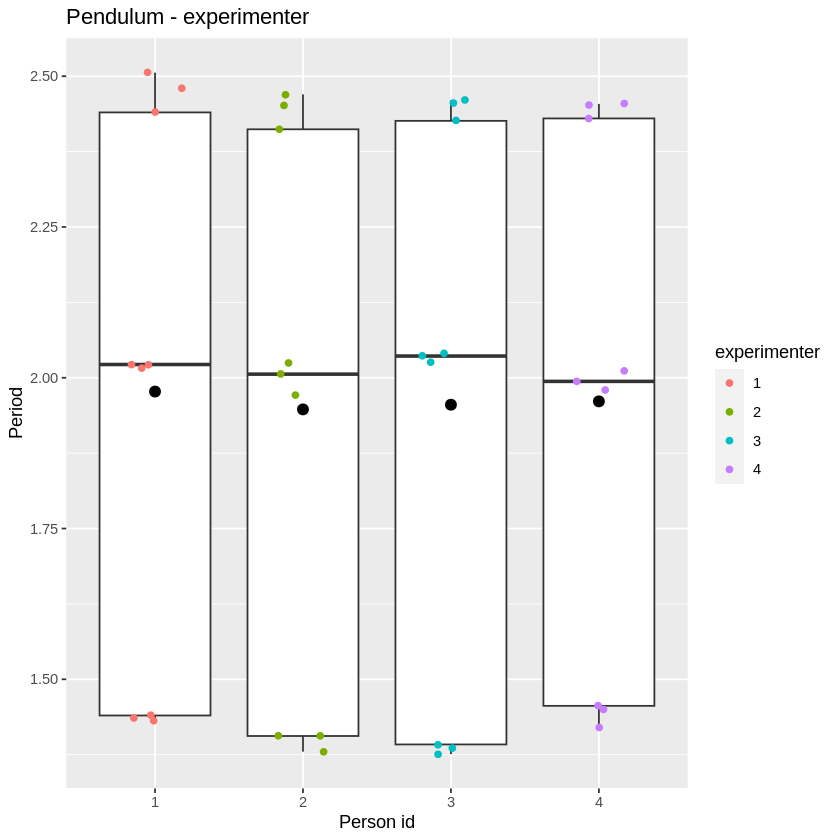

In [ ]:
ggplot(data, aes(x=experimenter, y=period)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=experimenter), position=position_jitter(width=0.2)) +
  labs(title="Pendulum - experimenter", x="Person id", y="Period")

Different experimenters have  slight effects on measured period, they are mostly visible on the measurements with the shortest string as they are most sensitive to various individual factors such as the release geometry, the setup, or individual biases.

Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”


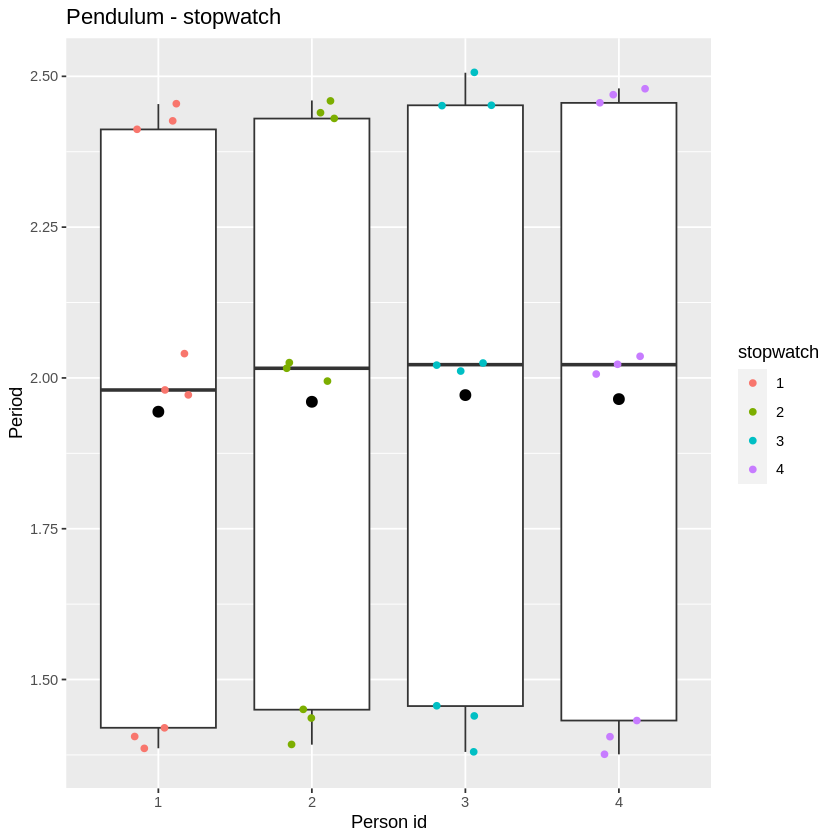

In [ ]:
ggplot(data, aes(x=stopwatch, y=period)) +
  geom_boxplot() +
  stat_summary(fun.y="mean") +
  geom_point(aes(color=stopwatch), position=position_jitter(width=0.2)) +
  labs(title="Pendulum - stopwatch", x="Person id", y="Period")

Different stopwatch operators have slight variations in the measured period. However, these differences aren't as pronounced as those observed among experimenters.

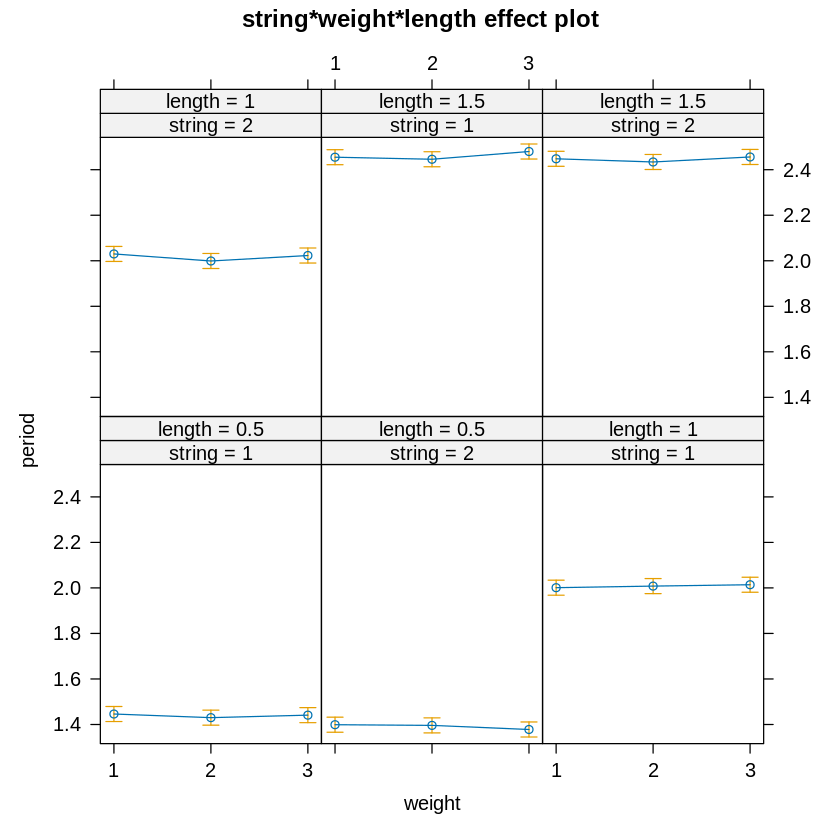

In [ ]:
model <- lm(period ~ string * weight * length, data=data)
plot(allEffects(model))

As the weight increases, the period seems to show a slight upward trend, especially for strings of length 1.5. This suggests that the pendulum's period might be affected by its weight.

Pendulums with a string length of 1.5 consistently have a higher period across all weight categories, suggesting that the length of the string has a more pronounced effect on the pendulum's period.

The length of the string have clear effects on the period. The type of string and the weight of the pendulum does not appear to significantly influence the period. There are variations in the period based on the experimenter and stopwatch operator, which might be due to individual biases or different experimental setups.


3. Focus especially on the factors length of rope, and number of weights; operator with its own rope ype is a nuisance parameter. Run one-way analysis of variance for each factor separately. Are there significant differences in means of frequency (or period)? For each factor: perform Tukey HSD and Fisher LSD test for pairwise comparison of means of individual groups.


In [ ]:
length_aov <- aov(period ~ length, data = data)
summary(length_aov)

            Df Sum Sq Mean Sq F value Pr(>F)    
length       2  6.516   3.258    5256 <2e-16 ***
Residuals   33  0.020   0.001                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In one-way ANOVA for the variable length the p-value is lower than 0.05 so we reject the null hypotheses, that the differences in means are not significant. So for the factor length of rope there are significant differences in means of period.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = period ~ length, data = data)

$length
             diff       lwr       upr p adj
1-0.5   0.5975000 0.5725585 0.6224415     0
1.5-0.5 1.0381667 1.0132251 1.0631082     0
1.5-1   0.4406667 0.4157251 0.4656082     0



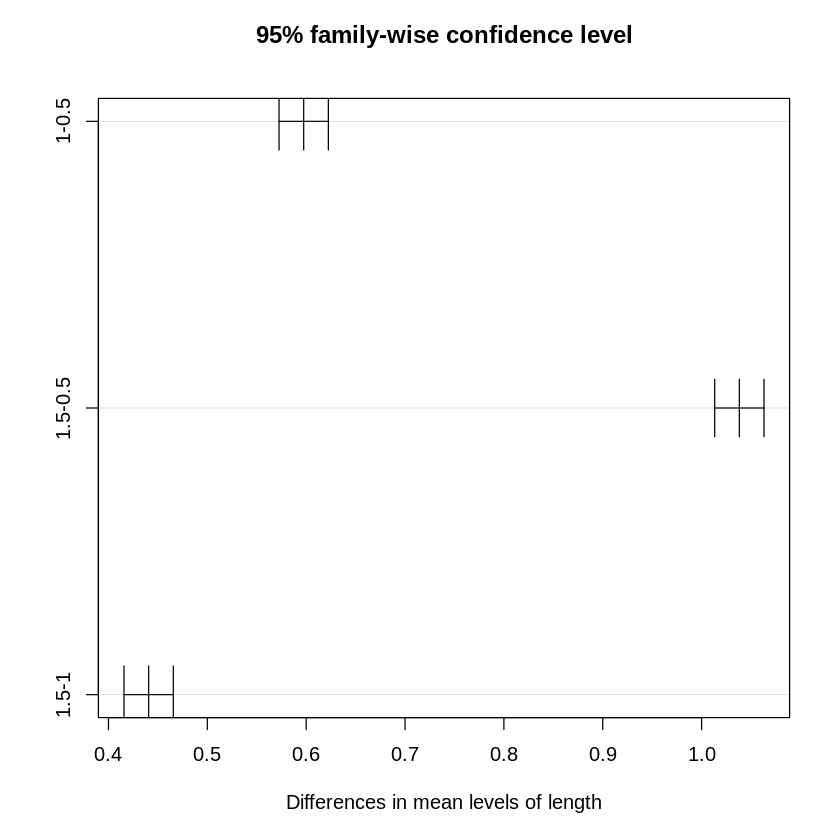

In [ ]:
tukey_length <- TukeyHSD(length_aov)
print(tukey_length)

plot(tukey_length)

In Tukey HSD all the p-values are 0, so the differences between all the groups of factor length are statistically significant at a 95% confidence level.

In [ ]:
lsd_length <- LSD.test(length_aov, 'length', group = FALSE)
print(lsd_length)

$statistics
      MSerror Df     Mean      CV  t.value        LSD
  0.000619899 33 1.960222 1.27015 2.034515 0.02067977

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none length   3  0.05

$means
      period        std  r          se      LCL      UCL   Min   Max    Q25
0.5 1.415000 0.02790243 12 0.007187367 1.400377 1.429623 1.376 1.456 1.3905
1   2.012500 0.02109933 12 0.007187367 1.997877 2.027123 1.972 2.040 2.0030
1.5 2.453167 0.02521844 12 0.007187367 2.438544 2.467789 2.412 2.506 2.4375
      Q50    Q75
0.5 1.413 1.4370
1   2.019 2.0245
1.5 2.453 2.4625

$comparison
          difference pvalue signif.        LCL        UCL
0.5 - 1   -0.5975000      0     *** -0.6181798 -0.5768202
0.5 - 1.5 -1.0381667      0     *** -1.0588464 -1.0174869
1 - 1.5   -0.4406667      0     *** -0.4613464 -0.4199869

$groups
NULL

attr(,"class")
[1] "group"


By the Fisher LSD test the results are the same as by Tukey HSD and there are statistically significant differences between all groups of the length of the rope.

In [ ]:
weight_aov <- aov(period ~ weight, data)
summary(weight_aov)

            Df Sum Sq Mean Sq F value Pr(>F)
weight       2  0.001  0.0006   0.003  0.997
Residuals   33  6.535  0.1980               

The p-value in ANOVA for the factor string is 0.997 (>0.05) so we don't reject the null hypotheses and there are not significant differences in means of period for number of weights.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = period ~ weight, data = data)

$weight
            diff        lwr       upr     p adj
2-1 -0.011000000 -0.4567946 0.4347946 0.9979810
3-1  0.002166667 -0.4436280 0.4479613 0.9999216
3-2  0.013166667 -0.4326280 0.4589613 0.9971087



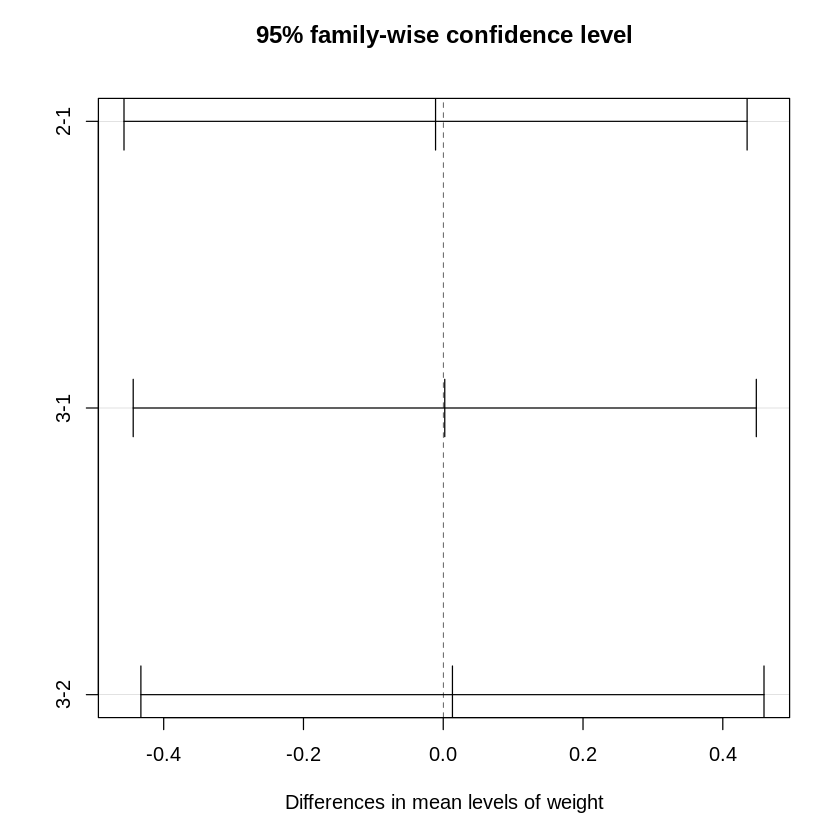

In [ ]:
tukey_weight <- TukeyHSD(weight_aov)
print(tukey_weight)

plot(tukey_weight)

The p-values are greater than 0.05 so the Tukey HSD test indicates that there are no statistically significant differences in means between all the groups of the number of weights at a 95% confidence level.

In [ ]:
lsd_weight <- LSD.test(weight_aov, 'weight', group = FALSE)
print(lsd_weight)

$statistics
    MSerror Df     Mean       CV  t.value       LSD
  0.1980362 33 1.960222 22.70215 2.034515 0.3696218

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none weight   3  0.05

$means
    period       std  r        se      LCL      UCL   Min   Max    Q25   Q50
1 1.963167 0.4411435 12 0.1284641 1.701805 2.224529 1.392 2.480 1.4510 2.023
2 1.952167 0.4400351 12 0.1284641 1.690805 2.213529 1.386 2.456 1.4350 2.008
3 1.965333 0.4537291 12 0.1284641 1.703971 2.226695 1.376 2.506 1.4455 2.014
     Q75
1 2.4270
2 2.4190
3 2.4525

$comparison
        difference pvalue signif.        LCL       UCL
1 - 2  0.011000000 0.9521         -0.3586218 0.3806218
1 - 3 -0.002166667 0.9906         -0.3717885 0.3674552
2 - 3 -0.013166667 0.9427         -0.3827885 0.3564552

$groups
NULL

attr(,"class")
[1] "group"


The Fisher LSD test also indicates that between all groups of the number of weights are no significant differences in means.


4. Analyse the data using ANOVA (take all variables as a factor).

    * With the assumption that each of the participants in the experiment forms a block.
    * Discuss results, verify assumptions, plot QQ-plot, residuals x fitted values, residuals x factor levels.
    * Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).
    * If the measured data do not meet the assumptions for using ANOVA, discuss possible transformations (logarithmic, Box-Cox, ...) and the reason why the data do not meet the assumptions?


Let's fit saturated model and then perform ANOVA on it.

In [ ]:
# ANOVA with blocking
anova_model <- aov(period ~ string + weight + length + experimenter + stopwatch, data=data)
summary(anova_model)

             Df Sum Sq Mean Sq  F value Pr(>F)    
string        1  0.003   0.003    5.366  0.029 *  
weight        2  0.001   0.001    1.157  0.331    
length        2  6.516   3.258 6302.951 <2e-16 ***
experimenter  2  0.001   0.001    1.409  0.263    
stopwatch     3  0.002   0.001    1.359  0.278    
Residuals    25  0.013   0.001                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the ANOVA model, we can see that the significant variables are string type and string length at the 5% significance level. Neither the weight of the pendulum, the experimenter, nor the stopwatch operator show significant effects on the period at the 5% significance level. The length of the string has a highly significant effect on the period of the pendulum, as expected from basic physics principles. The type of string also has a significant effect on the period, but the evidence is weaker.

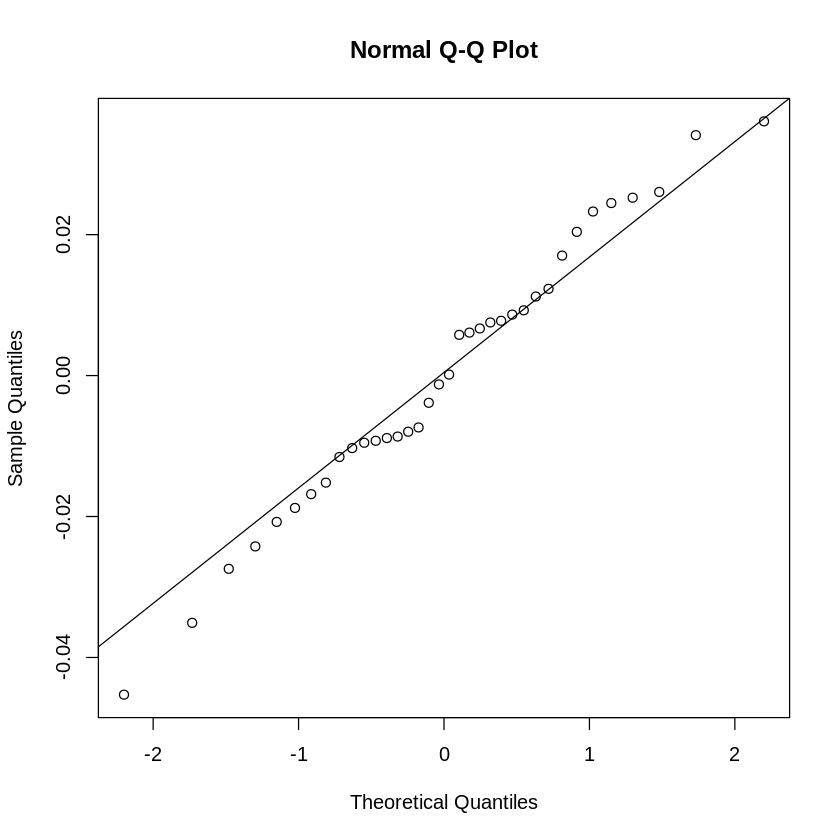

In [ ]:
qqnorm(residuals(anova_model))
qqline(residuals(anova_model))

The QQ-plot seem to deviate slightly from normality a little bit, especially at the left tail.

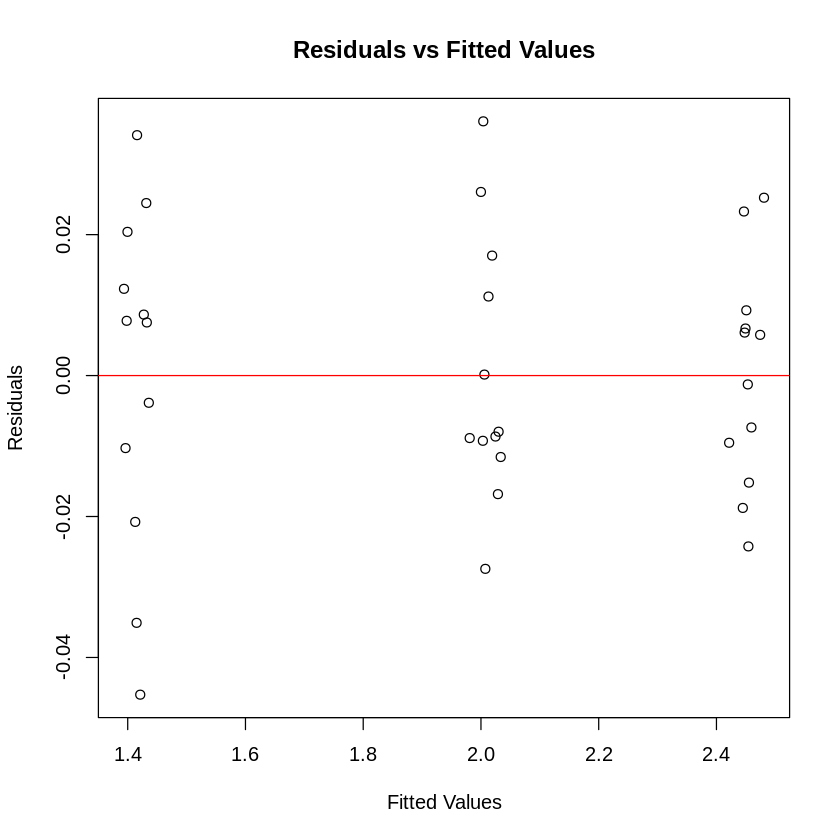

In [ ]:
plot(fitted(anova_model), residuals(anova_model),
     xlab="Fitted Values", ylab="Residuals",
     main="Residuals vs Fitted Values")
abline(h=0, col="red")


The residuals seem to be fairly random, suggesting that the variance of the residuals is constant across fitted values.

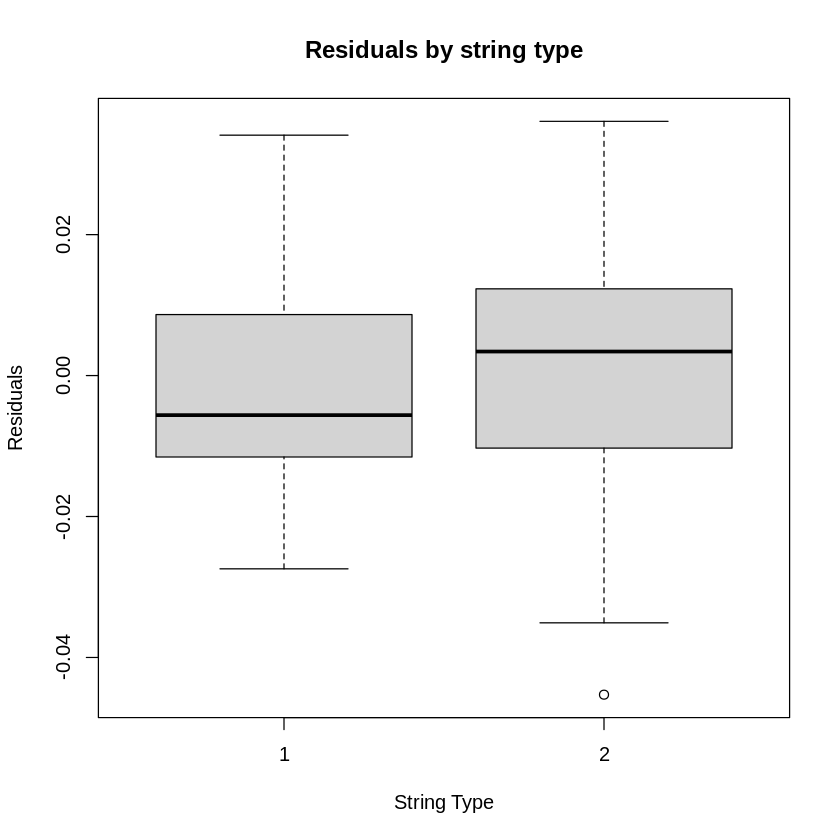

In [ ]:
# For image type
boxplot(residuals(anova_model) ~ data$string,
        ylab="Residuals", xlab="String Type",
        main="Residuals by string type")

The residuals for different string types seem to be spread fairly evenly across both string types.

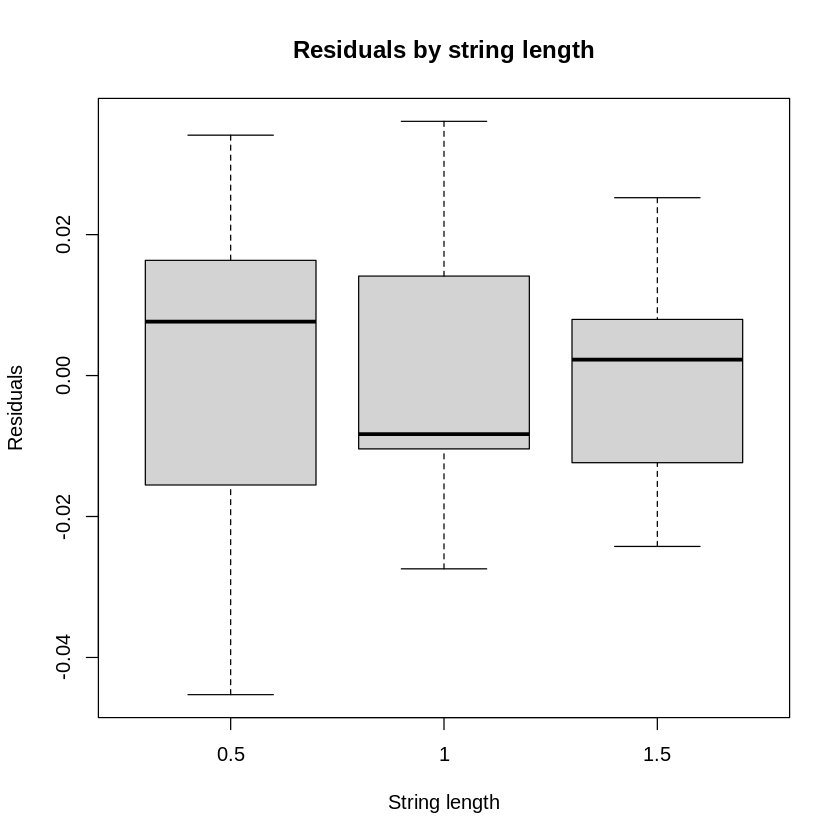

In [ ]:
# For image type
boxplot(residuals(anova_model) ~ data$length,
        ylab="Residuals", xlab="String length",
        main="Residuals by string length")

The residuals or different lengths of the string seem to be spread fairly.

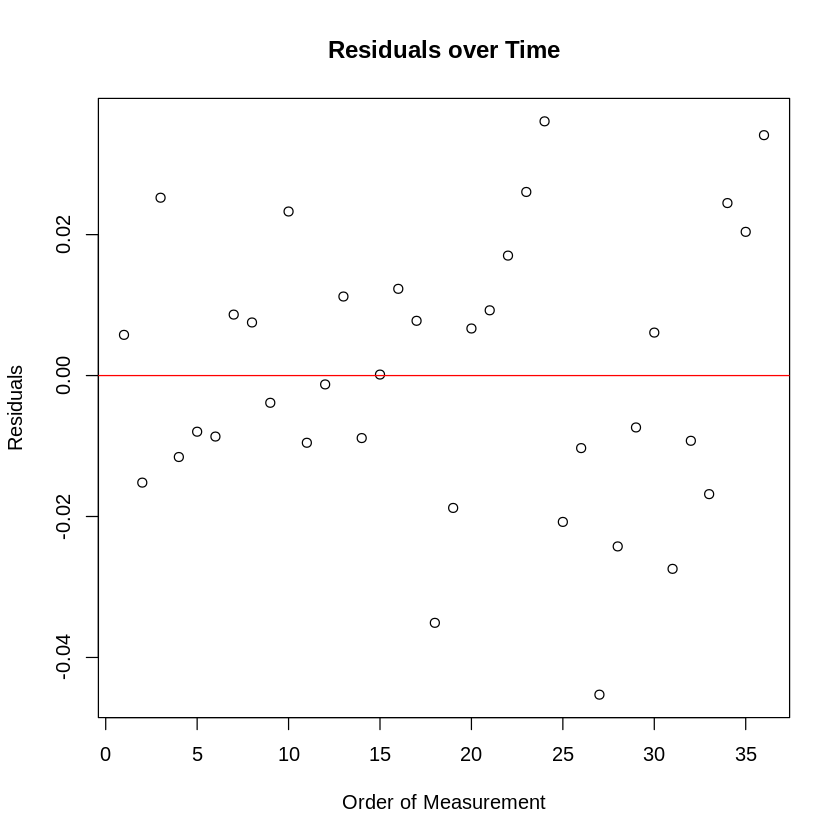

In [ ]:
# Evolution of Residuals Over Time
plot(seq_len(nrow(data)), residuals(anova_model),
     xlab="Order of Measurement", ylab="Residuals",
     main="Residuals over Time")
abline(h=0, col="red")

The residuals seem to oscillate around the zero line without any clear trend or pattern. There aren't any apparent periods of consistent positive or negative residuals, suggesting that the order in which the measurements were taken doesn't significantly affect the residuals.

Based on diagnostic plots, the deviations from the assumptions don't seem extreme, and a transformation is not necessary.







5. Choose one level of weights factor and *even if it does not meet the assumptions for using ANOVA*, solve the following:
   * Calculate the power of the test in the ANOVA for 3 different lenghts of ropes and **n** operators.
   * Assume the standard deviation of the disturbances to be a certain value for the experiment conducted
     and the maximum (for us significant) difference we want to detect is a certain frequency difference.
     Calculate the number of operators needed for the power of the resulting test to be greater than 0.9.


In [ ]:
library(pwr)

# Subset data for weight level 1 and take all lengths
subset_data_weight1 <- data[data$weight == 1, ]
lengths <- unique(subset_data_weight1$length)

power_results <- list()
for (len in lengths) {
  subset_data <- subset_data_weight1[subset_data_weight1$length == len, ]

  # ANOVA model for each subset
  model <- aov(time ~ factor(experimenter), data=subset_data)

  effect_size <- sqrt(sum(model[[1]]^2) / (sum(model[[1]]^2) + sum(resid(model)^2)))

  power_results[[as.character(len)]] <- pwr.anova.test(k=3, n=3, f=effect_size, sig.level=0.05)$power
}

print(power_results)

$`1.5`
[1] 0.5341266

$`1`
[1] 0.5341266

$`0.5`
[1] 0.5341266



So what that meains is that for the pendulum with a each rope length and a weight level of 1, there is a 53.41% chance that we can detect a significant difference among the three operators' measurements (assuming there truly is a difference). So we have consistent power of across lengths. The rest percentage of ca. 46 means we have kinda big chance to get Error of 2nd type - so we would not find the diferenc if there is one.

In [ ]:
#how many operators are needed?

#calculating disturbances and difference in frequencies for the next step of calculation.
model <- aov(time ~ factor(experimenter), data=subset_data_weight1)
sd_disturbance <- sd(resid(model))


means_per_experimenter <- tapply(subset_data_weight1$time, subset_data_weight1$experimenter, mean)
diff_freq <- max(means_per_experimenter) - min(means_per_experimenter)

print(sd_disturbance)
print(diff_freq)

[1] 2.204983
[1] 0.14


In [ ]:
# lets calcualte effect size for alpha = 0.05 and we want the power level be greater than 90%. There were always 3 ppl taking messurements, so k = 3.
effect_size <- diff_freq / sd_disturbance

power_result <- pwr.anova.test(k=3, f=effect_size, sig.level=0.05, power=0.9)
required_n <- ceiling(power_result$n)
print(required_n)

[1] 1048


So in conclusion we would need 1050 ppl taking 1 messurement of each setup to perform on 90% power level. I hope that we could make this number smaller if we  allow for each operator to take more messurements. e.g. 1O messurements would only need 1050%10 = 105 operators etc... am I right?




6. Create a regression model where you do not consider blocks and both length of the rope and number of weights are quantitative variables.
      * Try to add a squared variable to the model and compare the two regression models with each other and select the more appropriate one.
      * Check the assumptions for using the chosen model.


In [ ]:
# Convert 'length' and 'weight' to numeric
data$length <- as.numeric(data$length)
data$weight <- as.numeric(data$weight)

# Fit the first regression model
regression_model1 <- lm(period ~ length + weight, data = data)
summary(regression_model1)


Call:
lm(formula = period ~ length + weight, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.067306 -0.034326 -0.006139  0.036507  0.078694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.919889   0.027602  33.327   <2e-16 ***
length      0.519083   0.009376  55.364   <2e-16 ***
weight      0.001083   0.009376   0.116    0.909    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04593 on 33 degrees of freedom
Multiple R-squared:  0.9893,	Adjusted R-squared:  0.9887 
F-statistic:  1533 on 2 and 33 DF,  p-value: < 2.2e-16


In [ ]:
# Fit the second regression model with squared terms
regression_model2 <- lm(period ~ length + weight + I(length^2) + I(weight^2), data = data)
summary(regression_model2)


Call:
lm(formula = period ~ length + weight + I(length^2) + I(weight^2), 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.044111 -0.014194  0.000389  0.017681  0.047722 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.698778   0.044161  15.823  < 2e-16 ***
length       0.832750   0.035616  23.381  < 2e-16 ***
weight      -0.047250   0.035616  -1.327    0.194    
I(length^2) -0.078417   0.008813  -8.898 4.82e-10 ***
I(weight^2)  0.012083   0.008813   1.371    0.180    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02493 on 31 degrees of freedom
Multiple R-squared:  0.9971,	Adjusted R-squared:  0.9967 
F-statistic:  2622 on 4 and 31 DF,  p-value: < 2.2e-16


In [ ]:
# Perform ANOVA to compare the two models
anova_result <- anova(regression_model1, regression_model2)
print(anova_result)

Analysis of Variance Table

Model 1: period ~ length + weight
Model 2: period ~ length + weight + I(length^2) + I(weight^2)
  Res.Df      RSS Df Sum of Sq      F    Pr(>F)    
1     33 0.069622                                  
2     31 0.019260  2  0.050361 40.529 2.238e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Based on the comparison of the two models the one with squared variables appears to better fit the data.

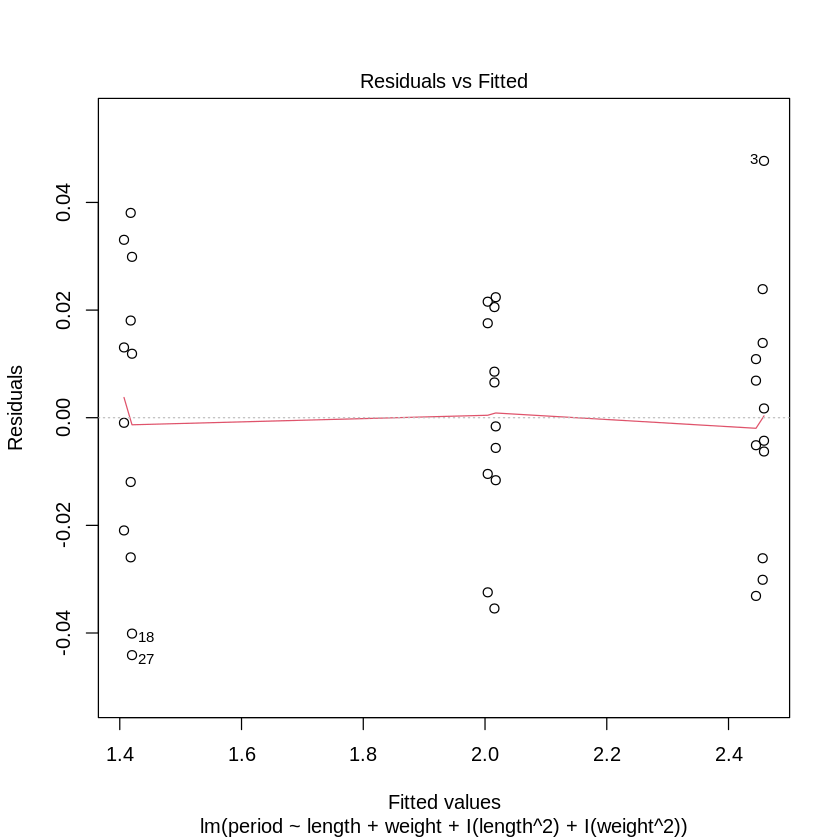

hat values (leverages) are all = 0.1388889
 and there are no factor predictors; no plot no. 5



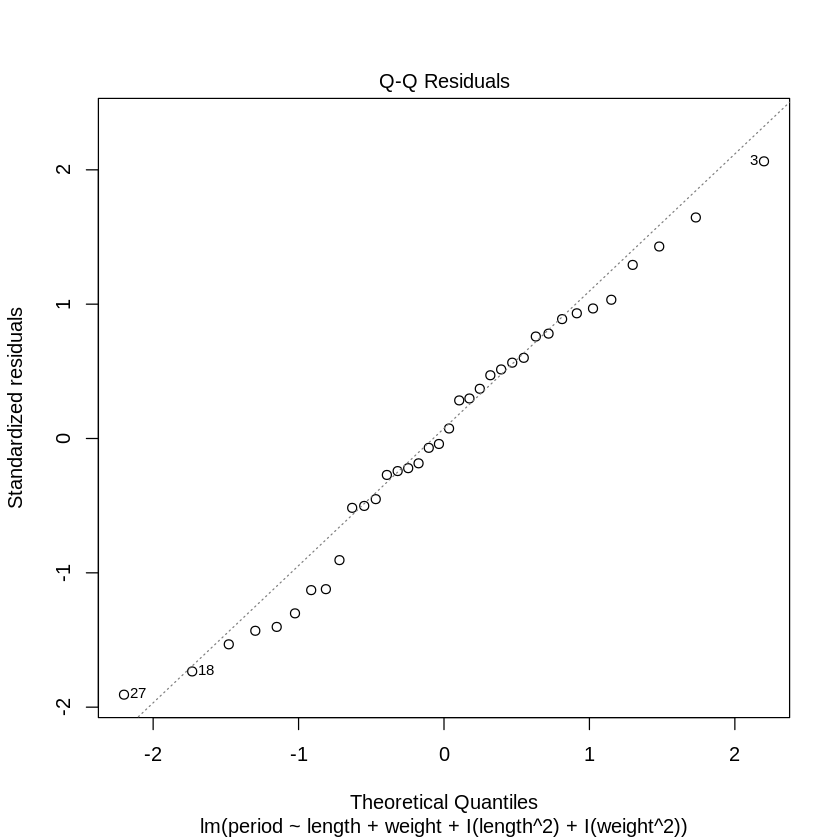

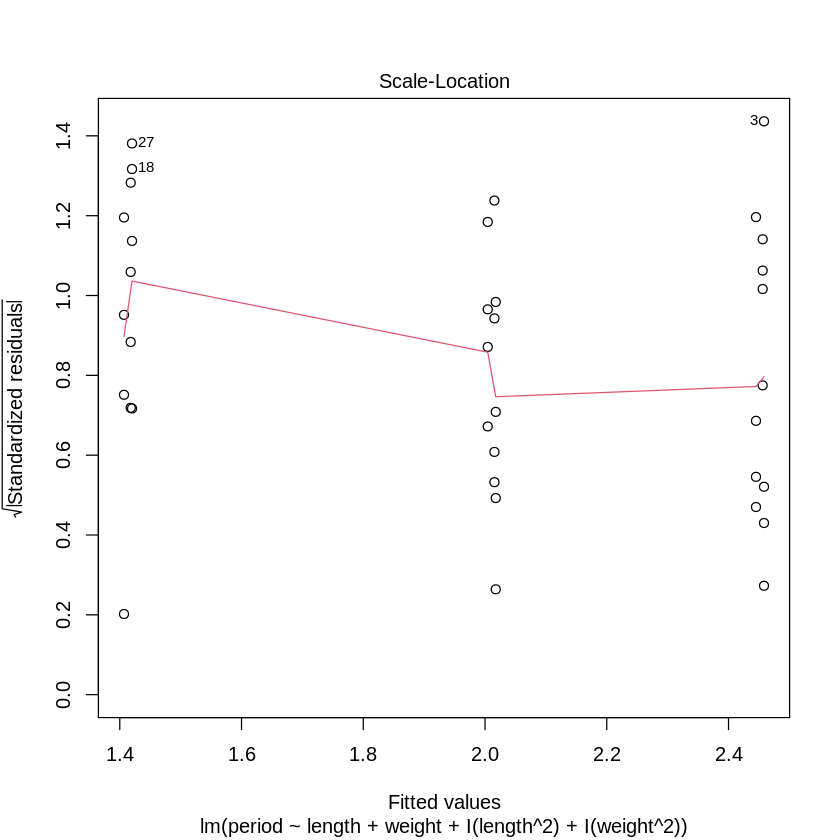

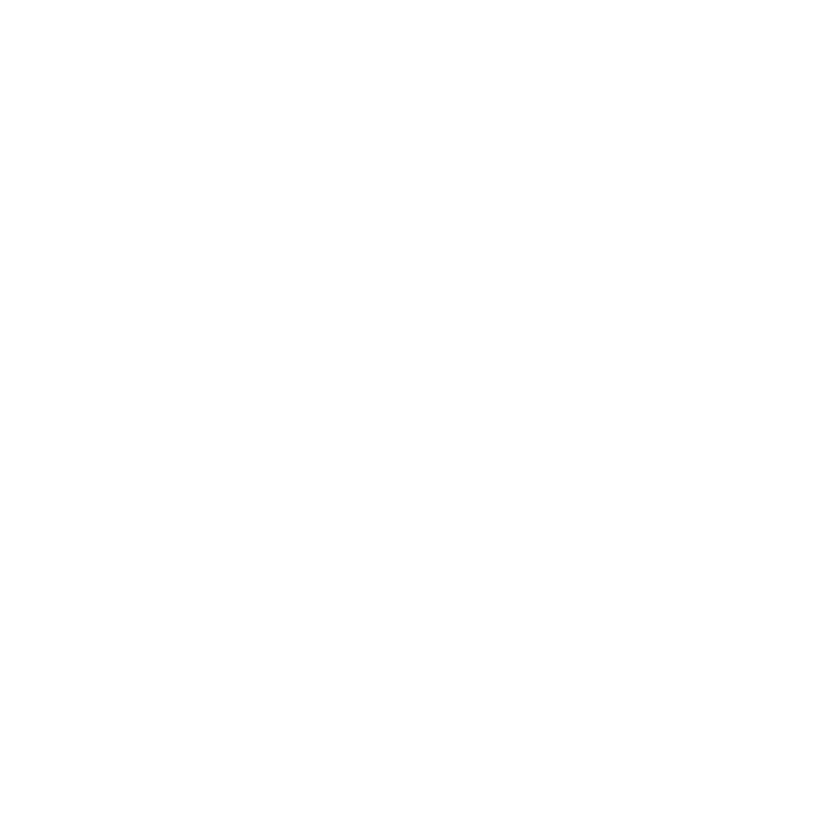

In [ ]:
plot(regression_model2)

In [ ]:
# Shapiro-Wilk test for normality of residuals
shapiro.test(regression_model2$residuals)


	Shapiro-Wilk normality test

data:  regression_model2$residuals
W = 0.97694, p-value = 0.6415


The residuals from Model 2 appear to be normally distributed. The plots dont suggest otherwise.


7. If you based your previous answers on the p-value, discuss following.  Does p-value provide a good measure of evidence regarding a model or hypothesis?

In the case of comparing the two models using anova the p value provides a good measure of evidence regarding the hypothesis that the second model fits the data better than the first one. It does not give us any insight into how good the model actually is. However, based on other measures the model seems to fit the data quite well.

Note: In case the blocks are highly dominant and none of the other variables appear significant,
      use only the "operator with the best data for academic purposes" for the resulting analysis.